# Hyperparameter Tuning

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5673 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 1.3216 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5972 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4985 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4608 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4410 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4463 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4283 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4139 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4107 - val_l

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 816us/step - loss: 0.3346


In [ ]:
y_pred = keras_reg.predict(X_new)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458 .....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 2ms/step - loss: 1.3827 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4880 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4541 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4518 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4337 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4263 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4385 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4301 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4108 - val_loss: 0.4040
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4200 - val_loss: 0.3886
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


242/242 [==============================] - 1s 2ms/step - loss: 1.3852 - val_loss: 0.4860
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4722 - val_loss: 0.4280
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4384 - val_loss: 0.5791
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4422 - val_loss: 0.4549
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4527 - val_loss: 0.5250
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4474 - val_loss: 0.5486
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4246 - val_loss: 0.5871
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4382 - val_loss: 0.4759
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4299 - val_loss: 0.7523
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4390 - val_loss: 0.7478
E

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  9.7min finished


363/363 [==============================] - 1s 2ms/step - loss: 1.4030 - val_loss: 1.8036
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5715 - val_loss: 2.0827
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4548 - val_loss: 0.3796
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4007 - val_loss: 0.4283
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3832 - val_loss: 0.3617
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3677 - val_loss: 0.4566
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3732 - val_loss: 0.3573
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3580 - val_loss: 0.3380
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3458 - val_loss: 0.3757
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3433 - val_loss: 0.4069
E

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb06ed97210>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.000392002...
                                                          0.0024505367684280487,
                                                          0.011155092541719619,
                                                          0.0007

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.005803602934201024, 'n_hidden': 3, 'n_neurons': 74}

In [ ]:
rnd_search_cv.best_score_

-0.316694974899292

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 919us/step - loss: 0.3026


-0.3025602102279663

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 936us/step - loss: 0.3026


0.3025602102279663

# Exercise solutions

## 1. to 9.

See appendix A.

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

Let's load the dataset:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

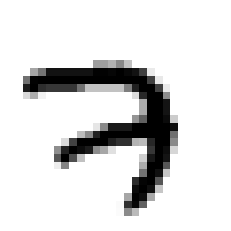

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

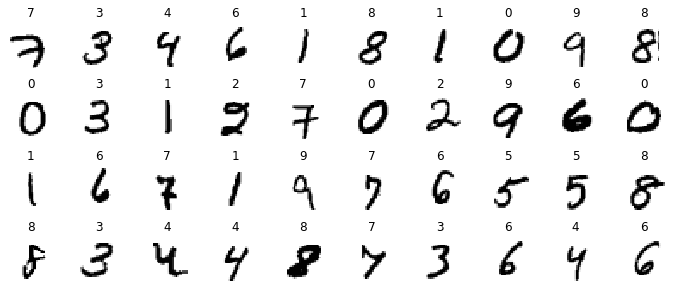

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 8s 4ms/step - loss: 7264674801477675384832.0000 - accuracy: 0.4891 - val_loss: 2.3911 - val_accuracy: 0.1126


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

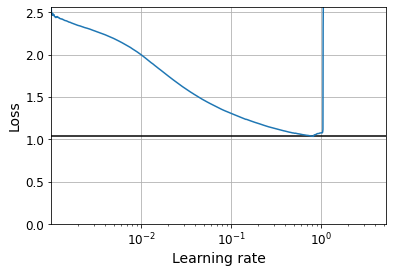

In [ ]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

In [ ]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4201 - accuracy: 0.8674 - val_loss: 0.1048 - val_accuracy: 0.9682
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0933 - accuracy: 0.9705 - val_loss: 0.0972 - val_accuracy: 0.9716
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0685 - accuracy: 0.9778 - val_loss: 0.0703 - val_accuracy: 0.9788
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.0766 - val_accuracy: 0.9792
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0839 - val_accuracy: 0.9760
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0758 - val_accuracy: 0.9800
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0256 - accuracy: 0.9910 - val_loss: 0.0951 - val_ac

In [ ]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9753


[0.07990259677171707, 0.9753000140190125]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [ ]:
%tensorboard --logdir=./my_mnist_logs --port=6006

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
2021-05-02 11:09:07.496309: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
E0502 11:09:09.954904 140063020865408 program.py:311] TensorBoard could not bind to port 6006, it was already in use
ERROR: TensorBoard could not bind to port 6006, it was already in use